In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# ==========================
# Cities Data
# ==========================
cityData = pd.DataFrame({
    "city_name": [
        "Delhi", "Mumbai", "Kolkata", "Chennai", "Bengaluru", "Hyderabad",
        "Pune", "Ahmedabad", "Jaipur", "Surat", "Lucknow", "Kanpur",
        "Nagpur", "Indore", "Bhopal", "Visakhapatnam", "Vadodara",
        "Nashik", "Rajkot", "Amritsar", "Coimbatore", "Patna", "Varanasi",
        "Ranchi", "Guwahati", "Chandigarh", "Thane", "Mysuru", "Ludhiana",
        "Noida", "Agra", "Jammu", "Udaipur", "Aurangabad", "Kolhapur"
    ]
})


In [3]:
# ==========================
# Function to Generate Weather Data
# ==========================
def generateWeatherData(cityData, limit):
    weatherDataSet = {
        "country": [],
        "city_name": [],
        "lon": [],
        "lat": [],
        "temp": [],
        "pressure": [],
        "humidity": [],
        "wind_speed": [],
    }

    for city in cityData["city_name"][:limit]:
        try:
            api = f"https://api.openweathermap.org/data/2.5/weather?q={city},in&appid=a7860b9cdd53e399a319baf0f53f4cfa&units=metric"
            requestObj = requests.get(api)
            jsonData = requestObj.json()

            weatherDataSet['country'].append(jsonData['sys']['country'])
            weatherDataSet['city_name'].append(jsonData['name'])
            weatherDataSet['lon'].append(jsonData['coord']['lon'])
            weatherDataSet['lat'].append(jsonData['coord']['lat'])
            weatherDataSet['temp'].append(jsonData['main']['temp'])
            weatherDataSet['pressure'].append(jsonData['main']['pressure'])
            weatherDataSet['humidity'].append(jsonData['main']['humidity'])
            weatherDataSet['wind_speed'].append(jsonData['wind']['speed'])

        except:
            pass

    df = pd.DataFrame(weatherDataSet)
    df.to_csv("weatherData.csv", index=False)
    return df

In [4]:
# ==========================
# Generate Data
# ==========================
df = generateWeatherData(cityData, 35)
print(df.head())


  country  city_name      lon      lat   temp  pressure  humidity  wind_speed
0      IN      Delhi  77.2167  28.6667  26.03      1012        13        3.53
1      IN     Mumbai  72.8479  19.0144  27.99      1011        69        4.12
2      IN    Kolkata  88.3697  22.5697  27.97      1009        74        1.54
3      IN    Chennai  80.2785  13.0878  25.51      1009        91        4.12
4      IN  Bengaluru  77.6033  12.9762  23.87      1011        76        4.47


In [5]:
# ==========================
# Basic Information
# ==========================
print(df.shape)
print(df.isna().sum())
print("Unique Cities:", len(df['city_name'].unique()))
print("Duplicate Rows:", df.duplicated().sum())

(35, 8)
country       0
city_name     0
lon           0
lat           0
temp          0
pressure      0
humidity      0
wind_speed    0
dtype: int64
Unique Cities: 35
Duplicate Rows: 0


In [6]:
# ==========================
# Drop Unnecessary Columns
# ==========================
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [7]:
# ==========================
# Descriptive Statistics and Info
# ==========================
print(df.describe())
print(df.info())

             lon        lat       temp     pressure   humidity  wind_speed
count  35.000000  35.000000  35.000000    35.000000  35.000000   35.000000
mean   77.635809  22.627034  24.522857  1011.657143  50.828571    2.429429
std     4.747528   5.605685   2.638562     1.532834  21.988614    1.280023
min    70.783300  11.000000  19.490000  1009.000000  12.000000    0.000000
25%    74.036000  19.107200  22.720000  1011.000000  37.500000    1.570000
50%    76.793300  22.717900  25.010000  1012.000000  54.000000    2.570000
75%    79.689250  26.658350  26.195000  1013.000000  66.500000    3.425000
max    91.751000  32.733300  28.880000  1015.000000  94.000000    4.470000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     35 non-null     object 
 1   city_name   35 non-null     object 
 2   lon         35 non-null     float64
 3   lat         3

In [8]:
# ==========================
# Sort by Temperature
# ==========================
tempWiseSorted = df.sort_values("temp", ascending=False)
print(tempWiseSorted.head())

   country      city_name      lon      lat   temp  pressure  humidity  \
20      IN     Coimbatore  76.9667  11.0000  28.88      1010        58   
1       IN         Mumbai  72.8479  19.0144  27.99      1011        69   
2       IN        Kolkata  88.3697  22.5697  27.97      1009        74   
26      IN          Thāne  72.9667  19.2000  27.95      1011        69   
15      IN  Visakhapatnam  83.2093  17.6900  27.94      1009        83   

    wind_speed  
20        2.57  
1         4.12  
2         1.54  
26        4.12  
15        1.03  


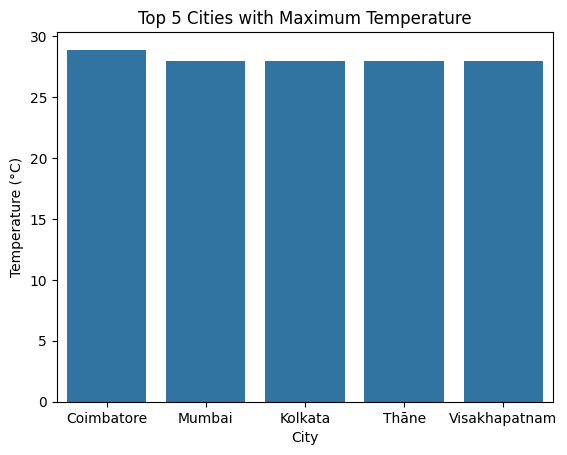

In [9]:
# ==========================
# Top Cities Visualization
# ==========================
sns.barplot(x=tempWiseSorted.iloc[:5, 1], y=tempWiseSorted.iloc[:5, 4])
plt.title("Top 5 Cities with Maximum Temperature")
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.show()

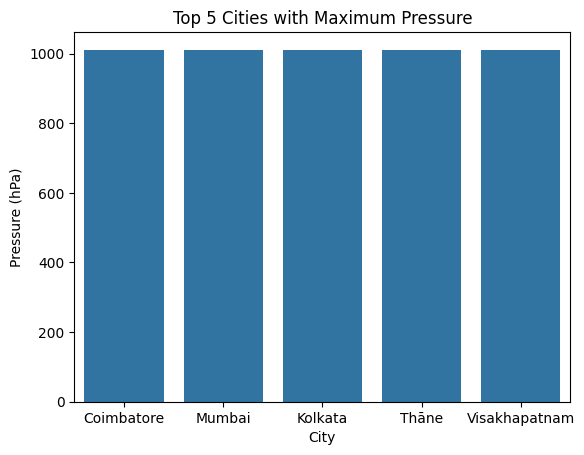

In [10]:
sns.barplot(x=tempWiseSorted.iloc[:5, 1], y=tempWiseSorted.iloc[:5, 5])
plt.title("Top 5 Cities with Maximum Pressure")
plt.xlabel("City")
plt.ylabel("Pressure (hPa)")
plt.show()

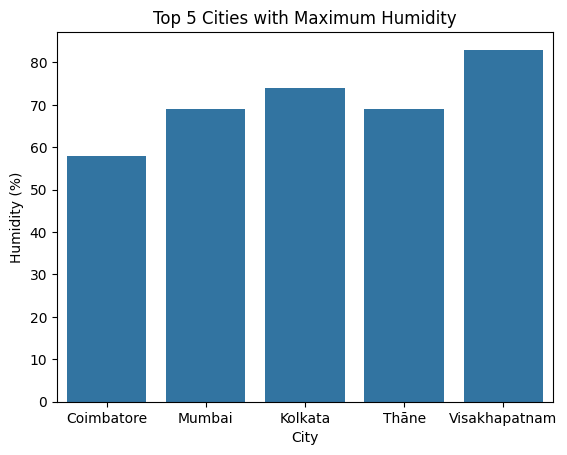

In [11]:
sns.barplot(x=tempWiseSorted.iloc[:5, 1], y=tempWiseSorted.iloc[:5, 6])
plt.title("Top 5 Cities with Maximum Humidity")
plt.xlabel("City")
plt.ylabel("Humidity (%)")
plt.show()

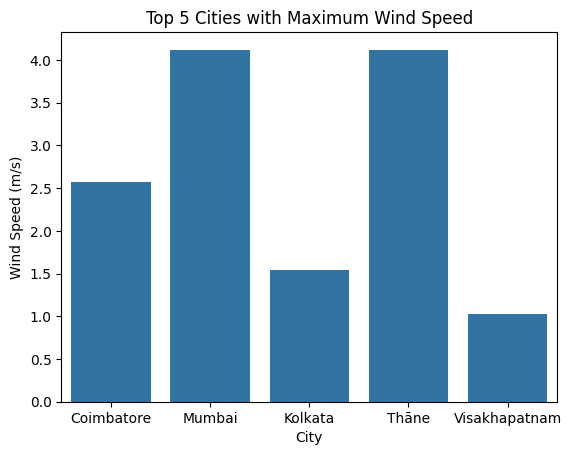

In [12]:
sns.barplot(x=tempWiseSorted.iloc[:5, 1], y=tempWiseSorted.iloc[:5, 7])
plt.title("Top 5 Cities with Maximum Wind Speed")
plt.xlabel("City")
plt.ylabel("Wind Speed (m/s)")
plt.show()

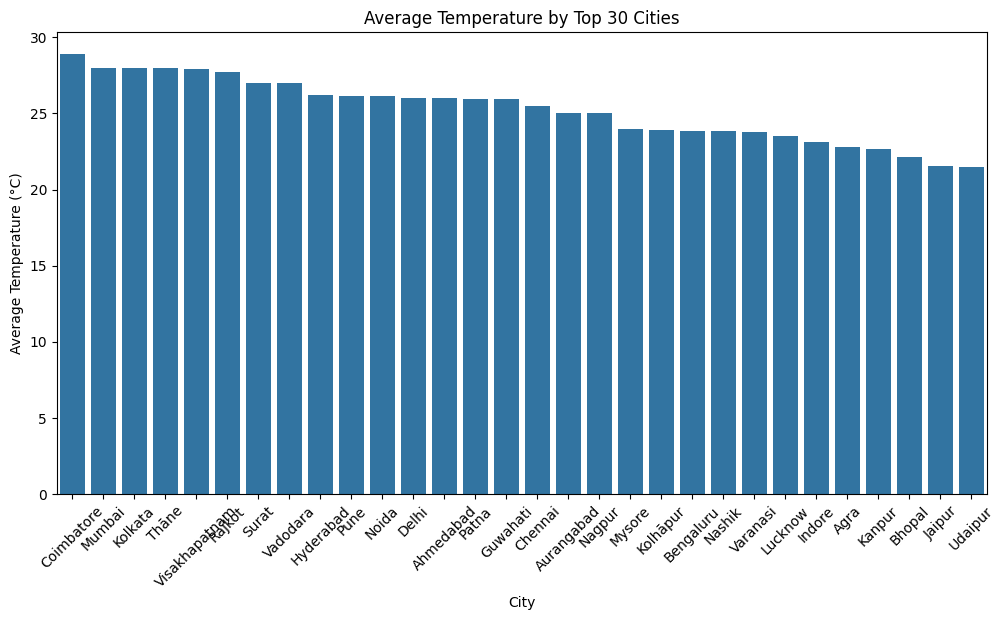

In [13]:
# ==========================
# Average Temperature by City
# ==========================
avg_temp_by_city = df.groupby('city_name')['temp'].mean().sort_values(ascending=False)[:30]
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_temp_by_city.index, y=avg_temp_by_city.values)
plt.title('Average Temperature by Top 30 Cities')
plt.xlabel('City')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

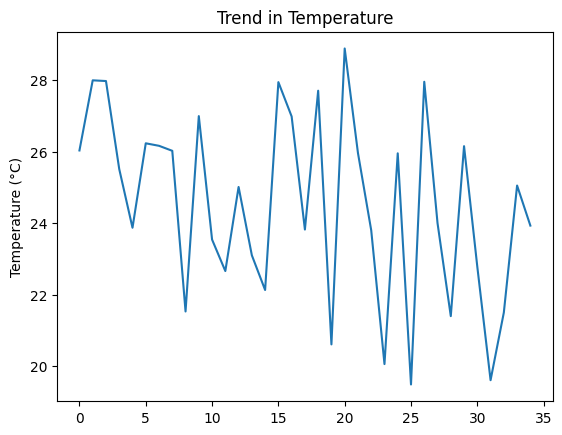

In [14]:

# ==========================
# Trend in Temperature
# ==========================
sns.lineplot(df.iloc[:100, 4])
plt.title("Trend in Temperature")
plt.ylabel("Temperature (°C)")
plt.show()

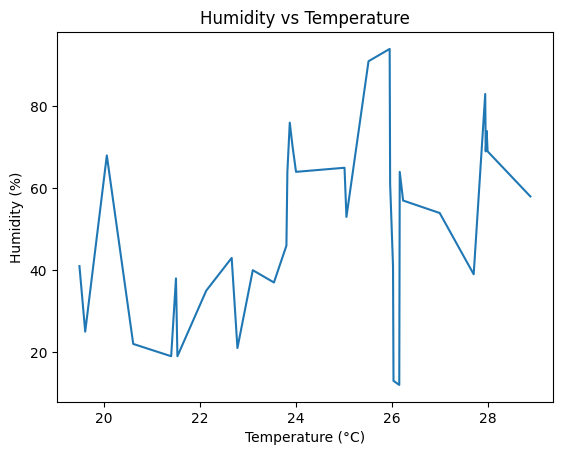

In [15]:
# ==========================
# Humidity vs Temperature
# ==========================
sns.lineplot(x=df.iloc[:150, 4], y=df.iloc[:150, 6])
plt.title("Humidity vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.show()


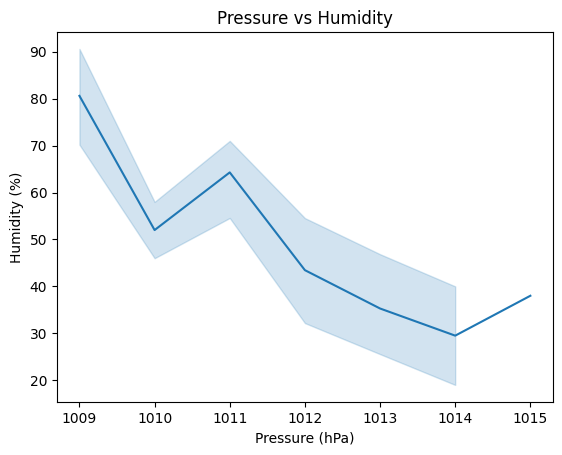

In [16]:
# ==========================
# Pressure vs Humidity
# ==========================
sns.lineplot(x=df.iloc[:, 5], y=df.iloc[:, 6])
plt.title("Pressure vs Humidity")
plt.xlabel("Pressure (hPa)")
plt.ylabel("Humidity (%)")
plt.show()


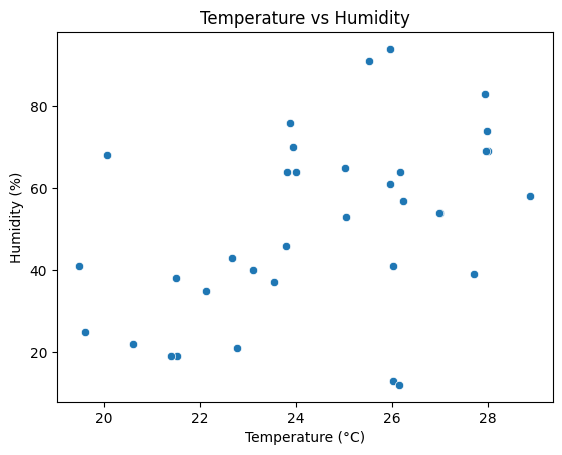

In [17]:
# ==========================
# Scatter Plot
# ==========================
sns.scatterplot(data=df, x='temp', y='humidity')
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.show()

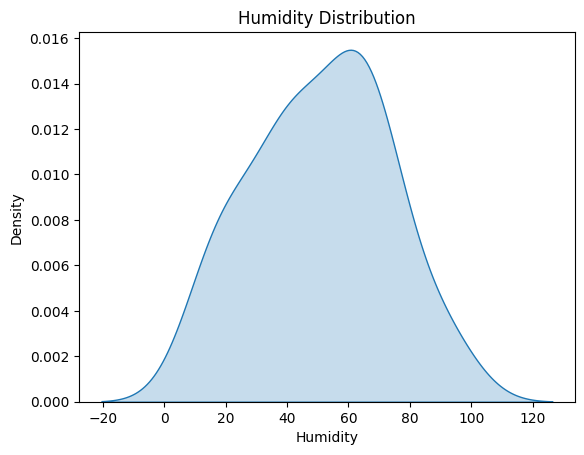

In [18]:
# ==========================
# KDE Plot
# ==========================
sns.kdeplot(data=df, x='humidity', fill=True)
plt.title('Humidity Distribution')
plt.xlabel('Humidity')
plt.ylabel('Density')
plt.show()


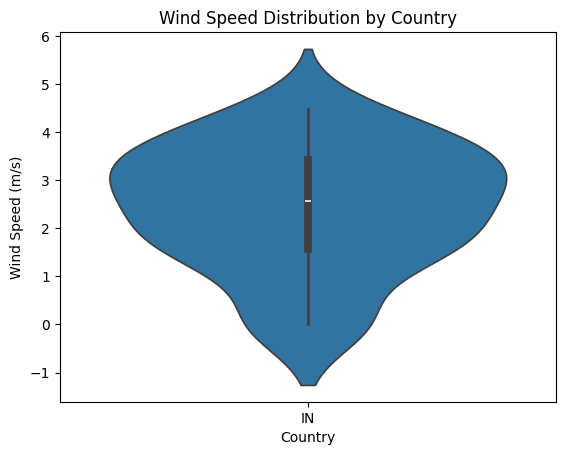

In [19]:
# ==========================
# Violin Plot
# ==========================
sns.violinplot(data=df, x='country', y='wind_speed')
plt.title('Wind Speed Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Wind Speed (m/s)')
plt.show()

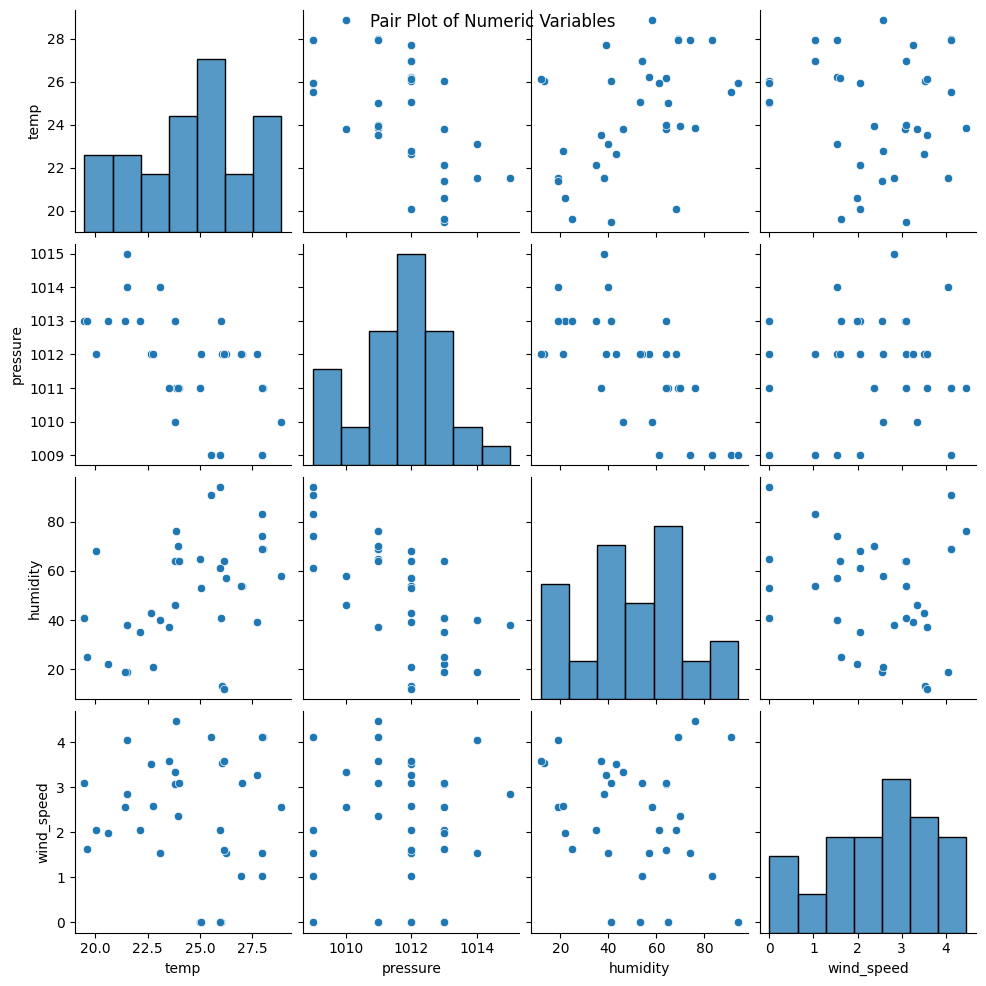

In [20]:
# ==========================
# Pair Plot
# ==========================
sns.pairplot(df[['temp', 'pressure', 'humidity', 'wind_speed']])
plt.suptitle('Pair Plot of Numeric Variables')
plt.show()

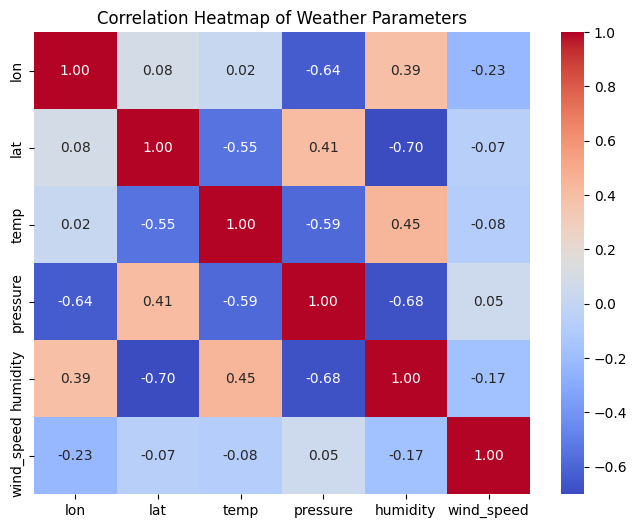

In [21]:

# ==========================
# Correlation Heatmap
# ==========================
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Weather Parameters")
plt.show()